# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import openpyxl

# 그래프 표출 시 한글폰트가 보이기 위한 설정

In [2]:
sns.set(rc={'axes.unicode_minus':False}, font='NanumBarunGothic', style='whitegrid', font_scale = 2)

# 시도별 순이동인구와 주민등록인구 살펴보기

* 순이동인구 = 전입인구 - 전출인구

In [3]:
# 순이동인구
movement_pop = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/시도별5세별순이동인구.csv',
                           encoding='cp949')
movement_pop.head()

,시점,행정구역(시군구)별,연령별,계
0,2011. 01,서울특별시,계,-4324
1,2011. 01,서울특별시,0 - 4세,-1025
2,2011. 01,서울특별시,5 - 9세,-402
3,2011. 01,서울특별시,10 - 14세,144
4,2011. 01,서울특별시,15 - 19세,97


In [5]:
movement_pop.columns = ['연월', '시도', '연령대', '순이동인구(명)']
movement_pop['연월'] = movement_pop['연월'].apply(lambda x: x.replace('. ', '-'))

# 서울, 경기, 부산, 제주만 보도록 하겠음
movement_pop = movement_pop[(movement_pop['시도'] == '서울특별시') | (movement_pop['시도'] == '경기도') |\
                           (movement_pop['시도'] == '부산광역시') | (movement_pop['시도'] == '제주특별자치도')]

movement_pop['연령대 구분'] = '노년'
movement_pop.loc[movement_pop['연령대'] == '계', '연령대 구분'] = '계'
movement_pop.loc[movement_pop['연령대'] == '0 - 4세', '연령대 구분'] = '영, 유아'
movement_pop.loc[(movement_pop['연령대'] == '5 - 9세') | (movement_pop['연령대'] == '10 - 14세') |\
                 (movement_pop['연령대'] == '15 - 19세'), '연령대 구분'] = '아동, 청소년'
movement_pop.loc[(movement_pop['연령대'] == '20 - 24세') | (movement_pop['연령대'] == '25 - 29세'), '연령대 구분'] = '청년'
movement_pop.loc[(movement_pop['연령대'] == '30 - 34세') | (movement_pop['연령대'] == '35 - 39세') |\
                 (movement_pop['연령대'] == '40 - 44세') | (movement_pop['연령대'] == '45 - 49세'), '연령대 구분'] = '중년'
movement_pop.loc[(movement_pop['연령대'] == '50 - 54세') | (movement_pop['연령대'] == '55 - 59세') |\
                 (movement_pop['연령대'] == '60 - 64세'), '연령대 구분'] = '장년'

movement_pop_age = movement_pop.pivot_table(index=['연월', '시도', '연령대 구분'], values='순이동인구(명)', aggfunc='sum')
movement_pop_age.reset_index(inplace=True)
movement_pop_age

,연월,시도,연령대 구분,순이동인구(명)
0,2011-01,경기도,계,8220
1,2011-01,경기도,노년,643
2,2011-01,경기도,"아동, 청소년",762
3,2011-01,경기도,"영, 유아",720
4,2011-01,경기도,장년,961
...,...,...,...,...
3691,2021-12,제주특별자치도,"아동, 청소년",30
3692,2021-12,제주특별자치도,"영, 유아",17
3693,2021-12,제주특별자치도,장년,8
3694,2021-12,제주특별자치도,중년,197


## 시도별 순이동인구와 매매가격지수 변동률

In [13]:
housing_sale = pd.read_excel('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/월간_매매가격지수_종합.xlsx')
housing_sale = housing_sale[9:]
housing_sale.set_index('* 통계표명 :', inplace=True)

housing_sale_trans = housing_sale.T
housing_sale_trans.set_index('지 역', inplace=True)

housing_sale_stack = pd.DataFrame(housing_sale_trans.stack())
housing_sale_stack.reset_index(inplace=True)
housing_sale_stack.columns = ['연월', '시도', '매매가격지수']
housing_sale_stack['연월'] = housing_sale_stack['연월'].apply(lambda x: x.replace('년 ', '-'))
housing_sale_stack['연월'] = housing_sale_stack['연월'].apply(lambda x: x.replace('월', ''))
housing_sale_stack = housing_sale_stack[housing_sale_stack['연월'] > '2010-12']
housing_sale_stack.reset_index(inplace=True, drop=True)
housing_sale_stack

,연월,시도,매매가격지수
0,2011-01,전국,79.736537
1,2011-01,서울,83.35919
2,2011-01,경기,79.044845
3,2011-01,인천,85.137084
4,2011-01,부산,74.324255
...,...,...,...
2371,2021-12,전북,103.438183
2372,2021-12,전남,101.798729
2373,2021-12,경북,102.458359
2374,2021-12,경남,103.584098


In [37]:
movement_pop_sum = movement_pop_age[movement_pop_age['연령대 구분'] == '계']
movement_pop_jeju = movement_pop_sum[movement_pop_sum['시도'] == '제주특별자치도']

housing_sale_jeju = housing_sale_stack[housing_sale_stack['시도'] == '제주']
housing_sale_jeju['매매가격지수'] = housing_sale_jeju['매매가격지수'].astype(float)
housing_sale_jeju

<ipython-input-37-cec38cd17239>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_sale_jeju['매매가격지수'] = housing_sale_jeju['매매가격지수'].astype(float)


,연월,시도,매매가격지수
17,2011-01,제주,80.107445
35,2011-02,제주,81.056562
53,2011-03,제주,81.141331
71,2011-04,제주,81.227879
89,2011-05,제주,81.225890
...,...,...,...
2303,2021-08,제주,101.703227
2321,2021-09,제주,102.563568
2339,2021-10,제주,103.335941
2357,2021-11,제주,103.763857


In [52]:
housing_sale_jeju.reset_index(inplace=True, drop=True)

for i in housing_sale_jeju.index:
    if i == 0:
        pass
    else:
        housing_sale_jeju['변동률'][i] = round(housing_sale_jeju['매매가격지수'][i] - housing_sale_jeju['매매가격지수'][i-1], 2)
housing_sale_jeju

<ipython-input-52-529392cbe345>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_sale_jeju['변동률'][i] = round(housing_sale_jeju['매매가격지수'][i] - housing_sale_jeju['매매가격지수'][i-1], 2)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,연월,시도,매매가격지수,변동률
0,2011-01,제주,80.107445,NaN
1,2011-02,제주,81.056562,0.95
2,2011-03,제주,81.141331,0.08
3,2011-04,제주,81.227879,0.09
4,2011-05,제주,81.225890,-0.00
...,...,...,...,...
127,2021-08,제주,101.703227,0.97
128,2021-09,제주,102.563568,0.86
129,2021-10,제주,103.335941,0.77
130,2021-11,제주,103.763857,0.43


In [112]:
# 주민등록인구
register_pop = pd.read_csv('C:/Users/sosen/OneDrive/바탕 화면/플렉싱크/스터디/01부동산데이터시각화/시도별주민등록인구.csv',
                           encoding='cp949')
register_pop.columns = ['연월', '시도', '주민등록인구(명)']
register_pop['연월'] = register_pop['연월'].apply(lambda x: x.replace('. ', '-'))

# 제주만 보도록 하겠음
register_pop_jeju = register_pop[register_pop['시도'] == '제주특별자치도']
register_pop_jeju.reset_index(inplace=True, drop=True)

register_pop_jeju['주민등록인구(명)'] = register_pop_jeju['주민등록인구(명)'].astype(int)
register_pop_jeju

<ipython-input-112-b98dfb565fb7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  register_pop_jeju['주민등록인구(명)'] = register_pop_jeju['주민등록인구(명)'].astype(int)


,연월,시도,주민등록인구(명)
0,2011-01,제주특별자치도,571468
1,2011-02,제주특별자치도,571913
2,2011-03,제주특별자치도,572447
3,2011-04,제주특별자치도,572918
4,2011-05,제주특별자치도,573459
...,...,...,...
127,2021-08,제주특별자치도,675883
128,2021-09,제주특별자치도,676079
129,2021-10,제주특별자치도,676569
130,2021-11,제주특별자치도,676768


In [117]:
register_pop_jeju['인구변화(명)'] = None

for i in register_pop_jeju.index:
    if i == 0:
        pass
    else:
        register_pop_jeju['인구변화(명)'][i] = round(register_pop_jeju['주민등록인구(명)'][i] - register_pop_jeju['주민등록인구(명)'][i-1], 2)
register_pop_jeju['인구변화(명)'] = register_pop_jeju['인구변화(명)'].astype(float)
register_pop_jeju.tail(20)

<ipython-input-117-380e71e58a67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  register_pop_jeju['인구변화(명)'] = None
<ipython-input-117-380e71e58a67>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  register_pop_jeju['인구변화(명)'][i] = round(register_pop_jeju['주민등록인구(명)'][i] - register_pop_jeju['주민등록인구(명)'][i-1], 2)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,연월,시도,주민등록인구(명),인구변화(명)
112,2020-05,제주특별자치도,670793,198.0
113,2020-06,제주특별자치도,671316,523.0
114,2020-07,제주특별자치도,671913,597.0
115,2020-08,제주특별자치도,672524,611.0
116,2020-09,제주특별자치도,672948,424.0
117,2020-10,제주특별자치도,673606,658.0
118,2020-11,제주특별자치도,674001,395.0
119,2020-12,제주특별자치도,674635,634.0
120,2021-01,제주특별자치도,674615,-20.0
121,2021-02,제주특별자치도,675137,522.0


Text(0.5, 1.0, '10년간 제주특별자치도의 주민등록인구와 매매가격지수 변화')

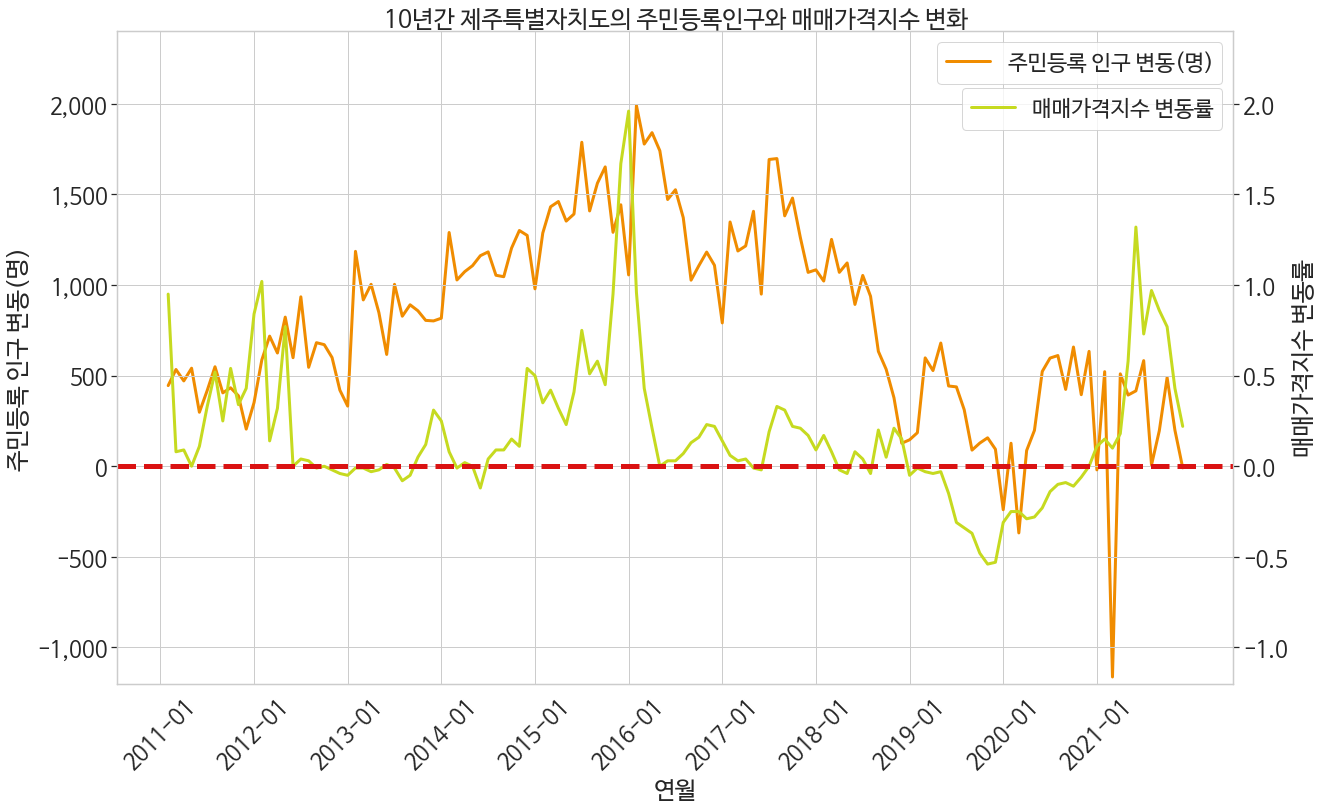

In [132]:
fig, axe1 = plt.subplots(figsize=(20,12))

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(round(x), ',')))

axe2 = axe1.twinx()

sns.lineplot(data=register_pop_jeju, x='연월', y='인구변화(명)', color = '#F08C00', ax=axe1, linewidth=3)
axe1.set_ylim(-1200, 2400)
axe1.set_ylabel('주민등록 인구 변동(명)')
sns.lineplot(data=housing_sale_jeju, x='연월', y='변동률', color = '#C6DA20', ax=axe2, linewidth=3)
axe2.set_ylim(-1.2, 2.4)
axe2.set_ylabel('매매가격지수 변동률')

axe1.legend(['주민등록 인구 변동(명)'], loc='upper right', bbox_to_anchor=(1, 1), fancybox=True)
axe2.legend(['매매가격지수 변동률'], loc='upper right', bbox_to_anchor=(1, 0.93), fancybox=True)
axe1.set_xticks([i for i in range(0, 132, 12)])
axe1.set_xticklabels([f'{i + 2011}-01' for i in range(11)], rotation=45)
plt.axhline(y=0, color='#DA1212', linewidth=5, linestyle='--')
plt.title('10년간 제주특별자치도의 주민등록인구와 매매가격지수 변화')